# Name : **Tanishta** **Varman**
# School :**SCDS**
# Email ID : *tanishta.m-26@scds.saiuniversity.edu.in*

# Import Libraires

In [1]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score, f1_score
from tensorflow import keras
tf.random.set_seed(42)

2.17.1


# Import Dataset from Transferlearning Model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from numpy import load
x_train_std = load ('/content/drive/MyDrive/Models_3_TL/X_train_std.npy' )
x_test_std = load ( '/content/drive/MyDrive/Models_3_TL/X_test_std.npy' )
y_train = load ('/content/drive/MyDrive/Models_3_TL/y_train.npy')
y_test = load ('/content/drive/MyDrive/Models_3_TL/y_test.npy')

In [4]:
print("x_train_std shape : " .format(x_train_std.shape))
print("x_test_std shape : " .format(x_test_std.shape))

# we now save the best model we got from TL

ft_model=keras.models.load_model('/content/drive/MyDrive/Models_3_TL/01_EfficientNetV2B01_TransferLearning_Best_Model.h5')
ft_model.summary()

x_train_std shape : 
x_test_std shape : 


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, None, None, 3)  │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, None, None, 3)  │              0 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, None, None, 32) │            864 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, None, None, 32) │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, None, None, 32) │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, None, None, 16) │          4,608 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, None, None, 16) │             64 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, None, None, 16) │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_conv       │ (None, None, None, 64) │          9,216 │ block1a_project_activ… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_bn         │ (None, None, None, 64) │            256 │ block2a_expand_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_activation │ (None, None, None, 64) │              0 │ block2a_expand_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_conv      │ (None, None, None, 32) │          2,048 │ block2a_expand_activa… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_bn        │ (None, None, None, 32) │            128 │ block2a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 5,928,281 (22.61 MB)

 Trainable params: 5,867,671 (22.38 MB)

 Non-trainable params: 60,608 (236.75 KB)

 Optimizer params: 2 (12.00 B)

# Freezeing all other layers than the initial 35 %

In [5]:
totallayer=len(ft_model.layers)
index_split=int(0.35 * totallayer)
for i in ft_model.layers[:index_split]:
  i.trainable = False

### now we unfreeze the rest after the first 35%


In [6]:
for i in ft_model.layers[index_split:]:
  i.trainable=True

# Now we train the model

In [7]:
ft_model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics=['accuracy'])
calback_ft = [ keras.callbacks.ModelCheckpoint('bestTL.weights.h5', monitor='val_accuracy', save_best_only=True, save_weights_only=True)]
ft_hist=ft_model.fit(x=x_train_std, y=y_train ,  validation_split=0.1, batch_size=32,epochs=10 , callbacks=calback_ft)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 114s 5s/step - accuracy: 0.8317 - loss: 0.5017 - val_accuracy: 0.5641 - val_loss: 2.0397
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 57s 163ms/step - accuracy: 0.9193 - loss: 0.2508 - val_accuracy: 0.6923 - val_loss: 1.4682
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.9750 - loss: 0.1280 - val_accuracy: 0.6410 - val_loss: 1.5751
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.9873 - loss: 0.0520 - val_accuracy: 0.6410 - val_loss: 1.5034
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.9971 - loss: 0.0244 - val_accuracy: 0.6410 - val_loss: 1.5300
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.9892 - loss: 0.0474 - val_accuracy: 0.6410 - val_loss: 1.6668
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.9945 - loss: 0.0249 - val_accuracy: 0.6154 - val_loss: 1.6663
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.9852 - loss: 0.0363 - val_accuracy: 0.6154 -

# Graph

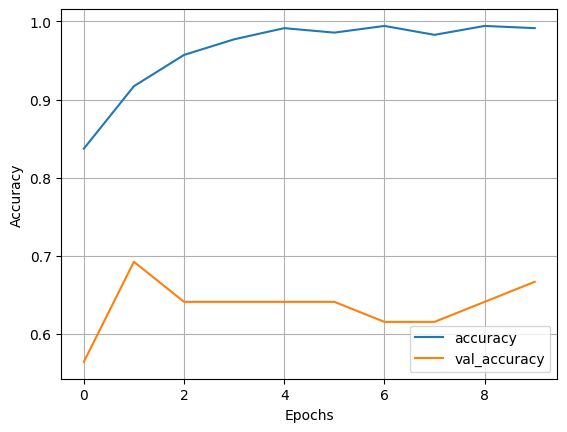

In [8]:
keys=['accuracy' , 'val_accuracy']
progress = { k:v for k , v in ft_hist.history.items() if k in keys}
import pandas as pd
pd.DataFrame(progress).plot()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

##Loss and Accuracy percentage

In [9]:
testloss_ft, testaccuracy_ft =ft_model.evaluate(x=x_test_std , y=y_test)
print("Test-Loss : %f , Test-Accuracy : %f " % (testloss_ft, testaccuracy_ft))

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7475 - loss: 1.1934
Test-Loss : 1.274134 , Test-Accuracy : 0.738462 


In [10]:
ft_model.load_weights("bestTL.weights.h5")
testloss_ft, testaccuracy_ft = ft_model.evaluate(x=x_test_std, y=y_test)
print("Test-Loss : %f , Test-Accuracy : %f " % (testloss_ft, testaccuracy_ft))

# prediction

pr=ft_model.predict(x_test_std)
label=np.argmax(pr, axis=-1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7242 - loss: 1.0729
Test-Loss : 1.182366 , Test-Accuracy : 0.707692 
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step


# Confusion Matrix

[[20  0  0  1  1  1  0]
 [ 0 20  0  0  0  0  0]
 [ 0  0  5  0  4  1  0]
 [ 9  2  0  4  0  0  1]
 [ 3  1  1  3 13  0  0]
 [ 2  0  0  3  1 13  3]
 [ 0  1  0  0  0  0 17]]


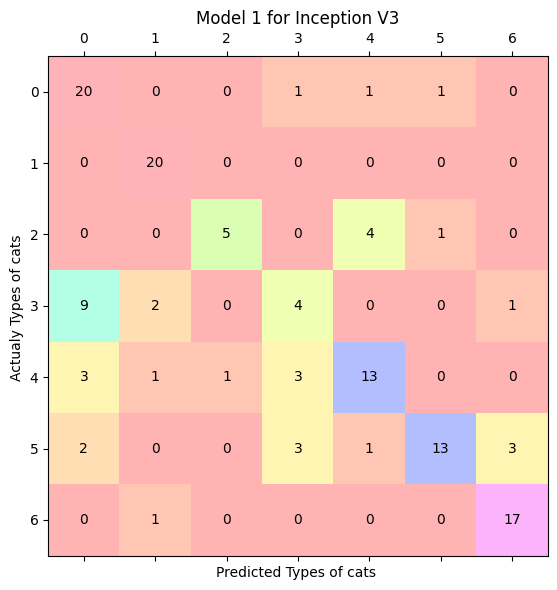

In [11]:
# the matrxi
cm=confusion_matrix(y_true= y_test , y_pred=label)
print(cm)
fig , ax = plt.subplots(figsize=(6,6))
ax.matshow(cm, cmap=plt.cm.hsv, alpha=0.3)
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(x=j, y=i, s=cm[i,j], va='center', ha= 'center')

ax.title.set_text('Model 1 for Inception V3')
plt.xlabel('Predicted Types of cats ')
plt.ylabel ('Actualy Types of cats ')
plt.tight_layout()
plt.savefig("ConfusionMatrix.png",dpi=300, format='png',pad_inches=0.3)
plt.show()

In [12]:
# Precision , Recall , F1
precision_score_model1=precision_score(y_true=y_test , y_pred=label , average='weighted')
print("The precision score of the model = " , precision_score_model1)

recall_score_model1=recall_score(y_true=y_test , y_pred=label , average='weighted')
print("The recall score of the model = " , recall_score_model1)

f1_score_model1=f1_score(y_true=y_test , y_pred=label , average='weighted')
print("The F1 score of the model = " , f1_score_model1)

The precision score of the model =  0.7104162297970348
The recall score of the model =  0.7076923076923077
The F1 score of the model =  0.6931898227039928


In [14]:


ft_model.save('/content/drive/MyDrive/Models_3_TL/02_EfficientNetV2B0_FinetTcuning_Best_Model.keras')
